In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Let's read the first n rows of the file "yt_with_less_col_2020_01.csv" inside the folder interim in data
yt_districts_df = pd.read_csv("data/out/yt_districts_cleaned.csv", usecols=["tpep_pickup_datetime","tpep_dropoff_datetime","passenger_count","trip_distance","PULocationID","DOLocationID","fare_amount","congestion_surcharge"])
yt_districts_df["PM"]=pd.Series({})
yt_districts_df.reset_index(inplace=True)
yt_districts_df.head()

/var/folders/1k/vynjj6l53696kyf1_6syqjtm0000gn/T/ipykernel_2869/205054781.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  yt_districts_df["PM"]=pd.Series({})


,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,congestion_surcharge,PM
0,0,1577838495,1577838783,1.0,1.2,Manhattan,Manhattan,6.0,2.5,NaN
1,1,1577838939,1577839384,1.0,1.2,Manhattan,Manhattan,7.0,2.5,NaN
2,2,1577839661,1577840032,1.0,0.6,Manhattan,Manhattan,6.0,2.5,NaN
3,3,1577838541,1577839228,2.0,0.7,Manhattan,Manhattan,8.0,2.5,NaN
4,4,1577840111,1577841123,2.0,2.4,Manhattan,Manhattan,12.0,2.5,NaN


In [6]:
#Lets compute 
yt_districts_df["PM"]=yt_districts_df["index"].apply(lambda x: yt_districts_df["fare_amount"][x]/yt_districts_df["trip_distance"][x])

In [7]:
yt_districts_df

,index,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,fare_amount,congestion_surcharge,PM
0,0,1577838495,1577838783,1.0,1.20,Manhattan,Manhattan,6.0,2.5,5.000000
1,1,1577838939,1577839384,1.0,1.20,Manhattan,Manhattan,7.0,2.5,5.833333
2,2,1577839661,1577840032,1.0,0.60,Manhattan,Manhattan,6.0,2.5,10.000000
3,3,1577838541,1577839228,2.0,0.70,Manhattan,Manhattan,8.0,2.5,11.428571
4,4,1577840111,1577841123,2.0,2.40,Manhattan,Manhattan,12.0,2.5,5.000000
...,...,...,...,...,...,...,...,...,...,...
5723985,5723985,1580511601,1580512891,1.0,4.11,Manhattan,Manhattan,17.5,2.5,4.257908
5723986,5723986,1580513887,1580514741,1.0,2.10,Manhattan,Manhattan,11.0,2.5,5.238095
5723987,5723987,1580511618,1580512758,1.0,2.13,Manhattan,Manhattan,13.0,2.5,6.103286
5723988,5723988,1580513062,1580514039,1.0,2.55,Manhattan,Manhattan,12.5,2.5,4.901961


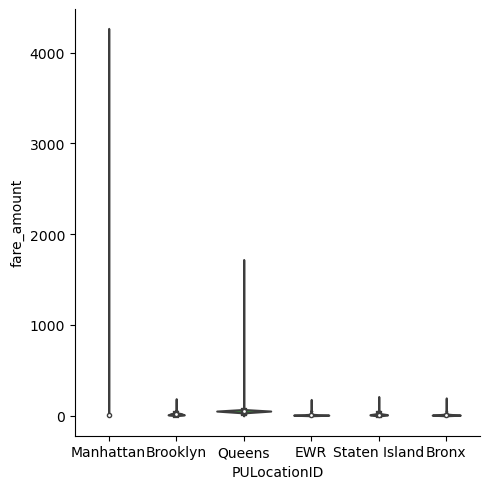

In [14]:
sns.catplot(data=yt_districts_df, x="PULocationID", y="fare_amount", kind="violin")

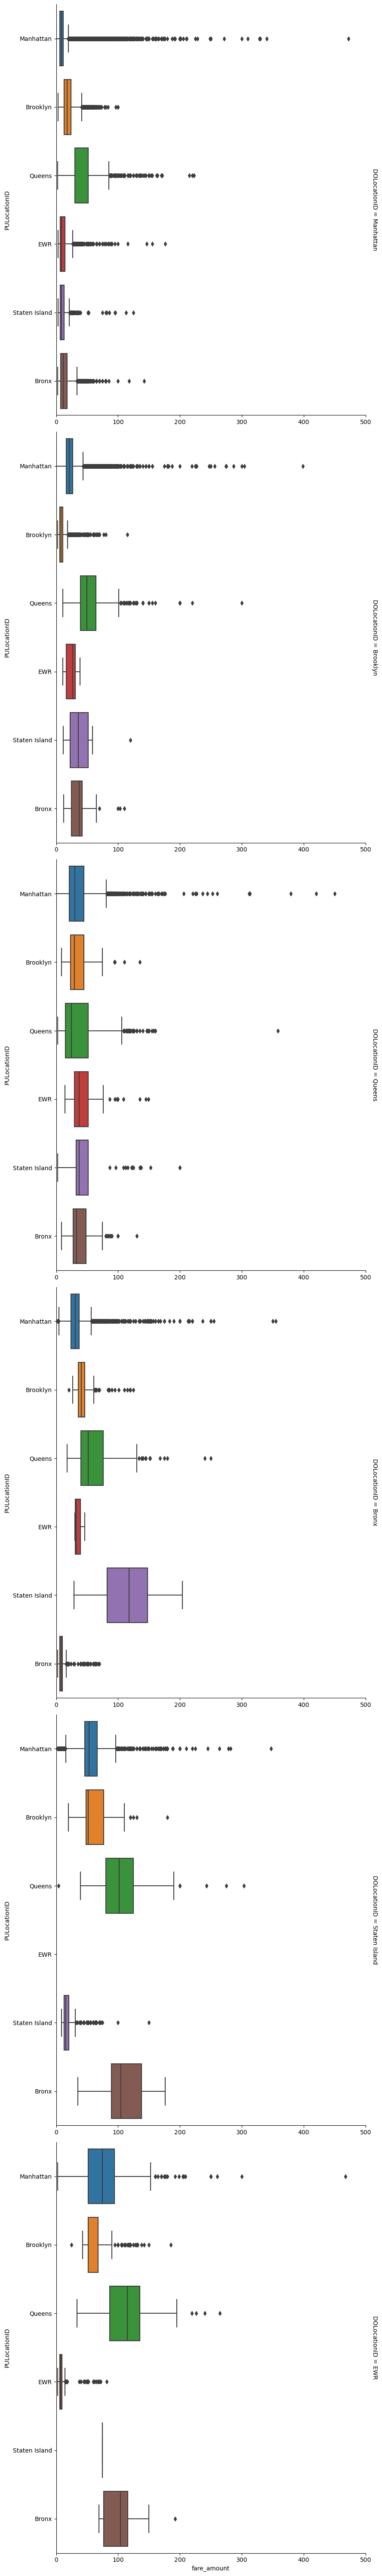

In [31]:
g = sns.catplot(
    data=yt_districts_df,
    x="fare_amount", y="PULocationID", row="DOLocationID",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=10, aspect=0.9
)

g.set(xlim=(0,500))

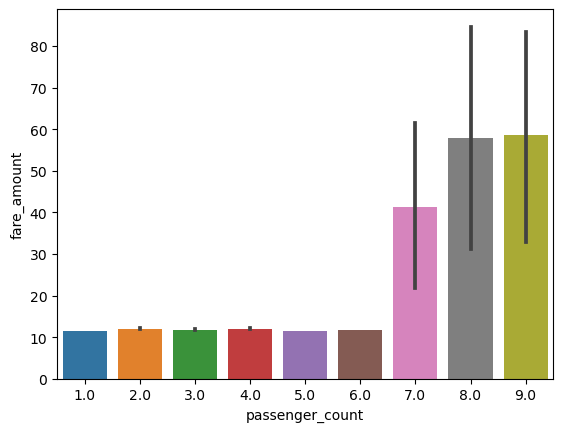

In [24]:
sns.barplot(data=yt_districts_df, x="passenger_count", y="fare_amount")
plt.savefig('./data/out/'+'yt_districts_2020_01'+
'_pgcount_fa_barchart.png',pad_inches=0.4,
bbox_inches = 'tight')

In [25]:
pivot = pd.pivot_table(yt_districts_df, index='PULocationID', columns='DOLocationID', values='passenger_count', aggfunc=np.sum)
pivot

DOLocationID,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
PULocationID,,,,,,
Bronx,6086.0,97.0,43.0,3102.0,358.0,31.0
Brooklyn,270.0,6250.0,290.0,27117.0,570.0,159.0
EWR,6.0,24.0,5647.0,1930.0,129.0,NaN
Manhattan,26769.0,219509.0,1717.0,8015337.0,259042.0,1798.0
Queens,469.0,578.0,123.0,278995.0,2442.0,173.0
Staten Island,26.0,75.0,4.0,1680.0,113.0,1332.0


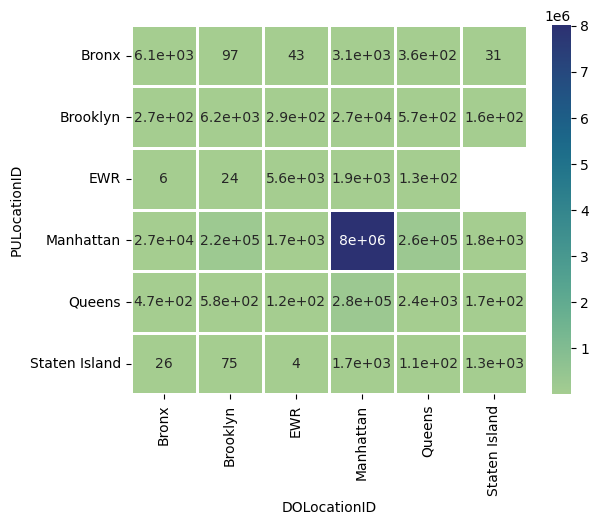

In [26]:
sns.heatmap(pivot, annot=True, linewidth=.9, cmap="crest")
plt.savefig('./data/out/'+'yt_districts_2020_01'+
'_pgcount_fa_heatmap.png',pad_inches=0.4,
bbox_inches = 'tight')

In [27]:
yt_districts__without_manhattan_df = yt_districts_df.drop(yt_districts_df[(yt_districts_df.DOLocationID == "Manhattan") & (yt_districts_df.PULocationID == "Manhattan")].index)

In [28]:
pivot = pd.pivot_table(yt_districts__without_manhattan_df, index='PULocationID', columns='DOLocationID', values='passenger_count', aggfunc=np.sum)
pivot

DOLocationID,Bronx,Brooklyn,EWR,Manhattan,Queens,Staten Island
PULocationID,,,,,,
Bronx,6086.0,97.0,43.0,3102.0,358.0,31.0
Brooklyn,270.0,6250.0,290.0,27117.0,570.0,159.0
EWR,6.0,24.0,5647.0,1930.0,129.0,NaN
Manhattan,26769.0,219509.0,1717.0,NaN,259042.0,1798.0
Queens,469.0,578.0,123.0,278995.0,2442.0,173.0
Staten Island,26.0,75.0,4.0,1680.0,113.0,1332.0


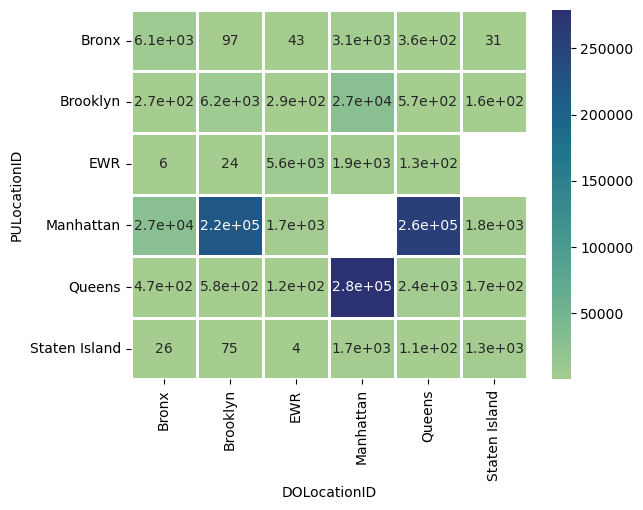

In [29]:
sns.heatmap(pivot, annot=True, linewidth=.9, cmap="crest")
plt.savefig('./data/out/'+'yt_districts_2020_01'+
'_pgcount_fa_heatmap_v2.png',pad_inches=0.4,
bbox_inches = 'tight')

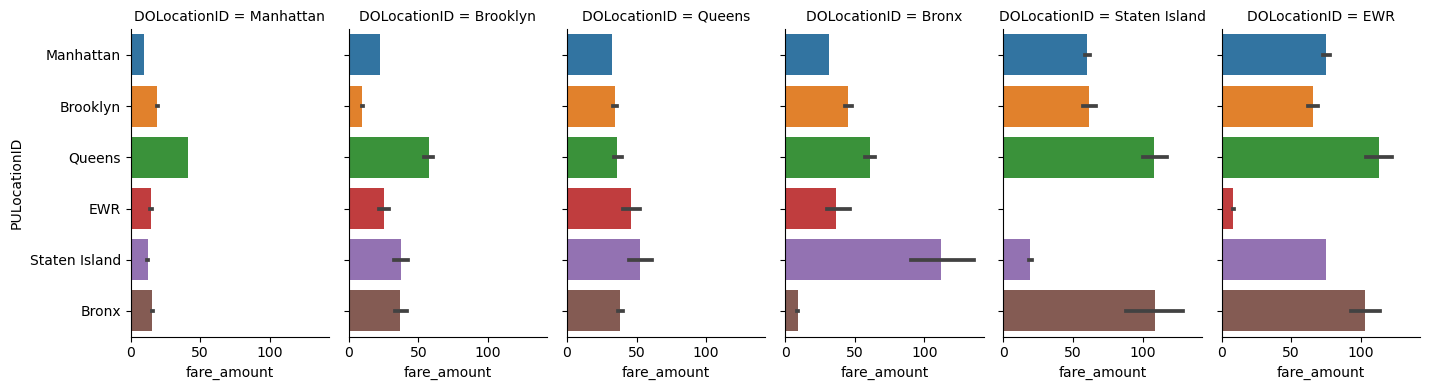

In [30]:
sns.catplot(data=yt_districts_df, x="fare_amount", y="PULocationID", col="DOLocationID",
kind="bar", height=4, aspect=.6
)
plt.savefig('./data/out/'+'yt_districts_2020_01'+
'_pgcount_fa_barplot.png',pad_inches=0.4,
bbox_inches = 'tight')

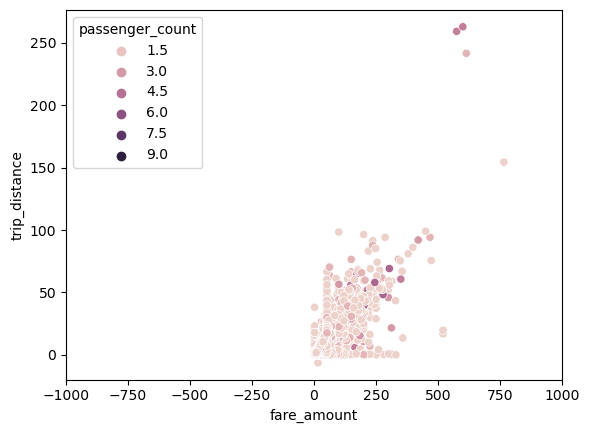

In [23]:
g=sns.scatterplot(data=yt_districts_df, x="fare_amount", y="trip_distance", hue="passenger_count")
plt.xlim(-1000, 1000)
plt.savefig('./data/out/'+'yt_districts_2020_01'+
'_pgcount_fa_scatterplot.png',pad_inches=0.4,
bbox_inches = 'tight')